## Implement Clustering Algorithms

In [1]:
%pip install pyspark

In [6]:
from pyspark.sql import SparkSession
from pyspark.ml.clustering import KMeans, GaussianMixture
from pyspark.ml.fpm import FPGrowth  # Used for Apriori
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
spark = SparkSession.builder.appName("ClusteringWithSpark").getOrCreate()

In [ ]:
from sklearn import datasets
import pandas as pd

# Load the Iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Convert Pandas DataFrame to Spark DataFrame
spark = SparkSession.builder.appName("IrisClustering").getOrCreate()
spark_df = spark.createDataFrame(df)
spark_df.show(5)

# K-means clustering

In [58]:
# Convert features into a single vector column
vec_assembler = VectorAssembler(inputCols=iris.feature_names, outputCol="features")
iris_df = vec_assembler.transform(spark_df)

# Apply K-Means
kmeans = KMeans(k=3, seed=1, featuresCol="features", predictionCol="cluster")
model = kmeans.fit(iris_df)
result = model.transform(iris_df)
result.select("features", "cluster").show(5)


+-----------------+-------+
|         features|cluster|
+-----------------+-------+
|[5.1,3.5,1.4,0.2]|      1|
|[4.9,3.0,1.4,0.2]|      1|
|[4.7,3.2,1.3,0.2]|      1|
|[4.6,3.1,1.5,0.2]|      1|
|[5.0,3.6,1.4,0.2]|      1|
+-----------------+-------+
only showing top 5 rows



#  Gaussian Mixture Model (GMM)

In [ ]:
gmm = GaussianMixture(k=3, seed=1, featuresCol="features", predictionCol="cluster") 
gmm_model = gmm.fit(iris_df) 
gmm_result = gmm_model.transform(iris_df) 
gmm_result.select("features", "cluster").show(5) 

+-----------------+-------+
|         features|cluster|
+-----------------+-------+
|[5.1,3.5,1.4,0.2]|      0|
|[4.9,3.0,1.4,0.2]|      0|
|[4.7,3.2,1.3,0.2]|      0|
|[4.6,3.1,1.5,0.2]|      0|
|[5.0,3.6,1.4,0.2]|      0|
+-----------------+-------+
only showing top 5 rows



# Hierarchical Clustering

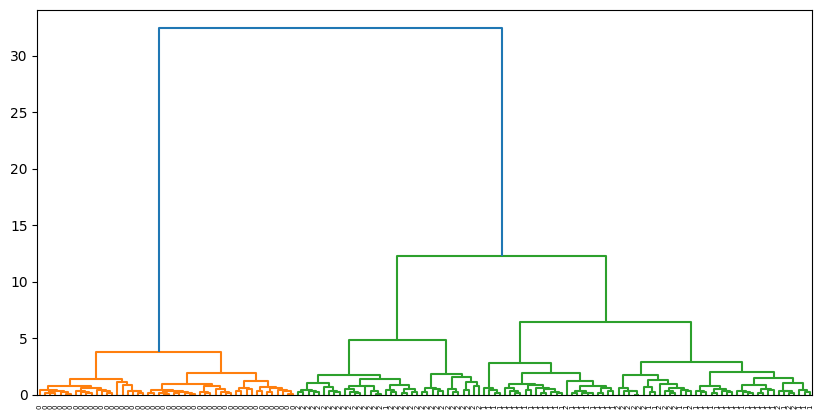

In [60]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform hierarchical clustering
linked = linkage(df, 'ward')
plt.figure(figsize=(10, 5))
dendrogram(linked, labels=iris.target)
plt.show()


# Spectral Clustering

In [61]:
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors')
clusters = spectral.fit_predict(df)
df['Spectral Cluster'] = clusters
df.head()


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Spectral Cluster
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


# Implement Association Rule Learning